<a href="https://colab.research.google.com/github/flubber-lab/D-Mart-Analysis/blob/main/DMart_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [ ]:
df = pd.read_csv('/content/DMart.csv')
df

,Name,Brand,Price,DiscountedPrice,Category,SubCategory,Quantity,Description,BreadCrumbs
0,Premia Badam (Almonds),Premia,451.0,329.0,Grocery,Grocery/Dry Fruits,500 gm,India,Grocery > Grocery/Dry Fruits
1,Premia Badam (Almonds),Premia,109.0,85.0,Grocery,Grocery/Dry Fruits,100 gm,India,Grocery > Grocery/Dry Fruits
2,Premia Badam (Almonds),Premia,202.0,175.0,Grocery,Grocery/Dry Fruits,200 gm,India,Grocery > Grocery/Dry Fruits
3,Nutraj California Almonds (Badam),Nutraj,599.0,349.0,Grocery,Dry Fruits,500 gm,USA,Grocery > Dry Fruits
4,Nutraj California Almonds (Badam),Nutraj,1549.0,659.0,Grocery,Dry Fruits,1 kg,USA,Grocery > Dry Fruits
...,...,...,...,...,...,...,...,...,...
5184,Navneet Youva A4 Notebook - Assorted,Navneet,55.0,36.0,School Supplies,School Needs,1 Book,OverviewEach book has an index page with label...,School Supplies > School Needs
5185,Navneet Youva Longbook Journal - Assorted,Navneet,85.0,69.0,School Supplies,School Needs,1 Book,OverviewStrong & sturdy case binding. Easy to ...,School Supplies > School Needs
5186,Navneet Youva Long Notebook - Assorted,Navneet,55.0,40.0,School Supplies,School Needs,1 Book,OverviewAttractive colour and designs. Easy to...,School Supplies > School Needs
5187,Navneet Youva Drawing Book - Assorted,Navneet,110.0,72.0,School Supplies,School Needs,1 Book,OverviewDrawing book has attractive cover desi...,School Supplies > School Needs


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5189 entries, 0 to 5188
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             5188 non-null   object 
 1   Brand            4789 non-null   object 
 2   Price            5188 non-null   float64
 3   DiscountedPrice  5188 non-null   float64
 4   Category         5186 non-null   object 
 5   SubCategory      5186 non-null   object 
 6   Quantity         5188 non-null   object 
 7   Description      5187 non-null   object 
 8   BreadCrumbs      5186 non-null   object 
dtypes: float64(2), object(7)
memory usage: 365.0+ KB


In [ ]:
df.isnull().sum()

,0
Name,1
Brand,400
Price,1
DiscountedPrice,1
Category,3
SubCategory,3
Quantity,1
Description,2
BreadCrumbs,3


In [ ]:
df['Brand'].unique()

array(['Premia', 'Nutraj', nan, 'Tata', 'Satyam', 'KMK',
       'DMart Healthy Choice', 'Tata Sampann', 'Kanji Manji Kothari',
       'ProV', 'Kalbavi', 'Kokan Gem', 'TATA', '24 Mantra Organic',
       'Organic Tattva', 'Nutrela', '24 Mantra', 'Carnival', 'Saffola',
       'Crown', 'Emperor', 'Falcon', 'Apis', 'King Solomon',
       'Royal Delight', 'Shamim', 'Candor', 'Mahafruit', 'Morya',
       'Keshar', 'Plain Jaggery', 'Laxmi', 'Miki', 'Fortune', 'Sunrich',
       'Gemini', 'Sunday', 'Swaad', 'Dhara', 'Nature Fresh', 'Dalda',
       'Sundrop', 'Sunny', 'Godrej', 'Aadhaar', 'Hudson', 'Svity Kolam',
       'RiSO', 'Ricela', 'Gulab', 'Guinea', 'RRO', 'RRO Primio',
       'Gramiyaa', 'Del Monte', 'Borges', 'Figaro', 'Leonardo',
       'Bertolli', 'Patanjali', 'Tez', 'Idhayam', 'KLF', 'Tilsona',
       'KPL Shudhi', 'Amul', 'Gowardhan', 'Aabad', 'Mother Dairy',
       'Sagar', 'Prabhat', 'Chitale Dairy', 'Dynamix', 'Govind',
       'Aashirvaad', 'Parsi Dairy Farm', 'Haribol', 'Organic 

In [ ]:
from sklearn.impute import KNNImputer

# Fill null values in 'Brand' with 'Unknown'
df['Brand'].fillna('Unknown', inplace=True)

# Fill null values in 'Description' with 'No Description'
df['Description'].fillna('No Description', inplace=True)

# Fill null values in 'BreadCrumbs' with the mode
df['BreadCrumbs'].fillna(df['BreadCrumbs'].mode()[0], inplace=True)

# Use KNN imputation for numerical columns
imputer = KNNImputer(n_neighbors=5)
df[['Price', 'DiscountedPrice']] = imputer.fit_transform(df[['Price', 'DiscountedPrice']])

# Check for null values again
print(df.isnull().sum())

Name               1
Brand              0
Price              0
DiscountedPrice    0
Category           3
SubCategory        3
Quantity           1
Description        0
BreadCrumbs        0
dtype: int64


In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isnull().sum()

,0
Name,0
Brand,0
Price,0
DiscountedPrice,0
Category,0
SubCategory,0
Quantity,0
Description,0
BreadCrumbs,0


**Price Analysis**

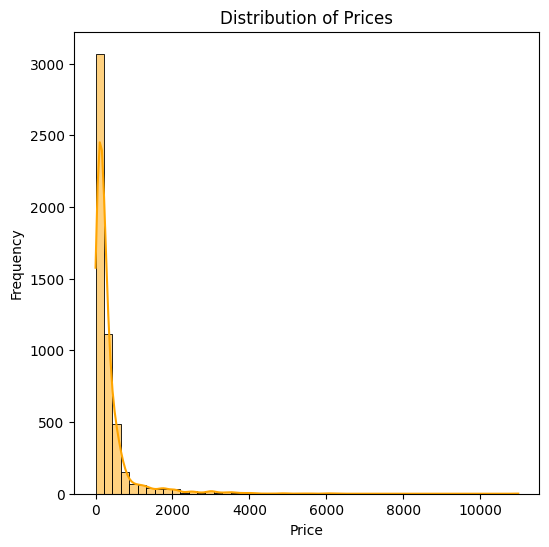

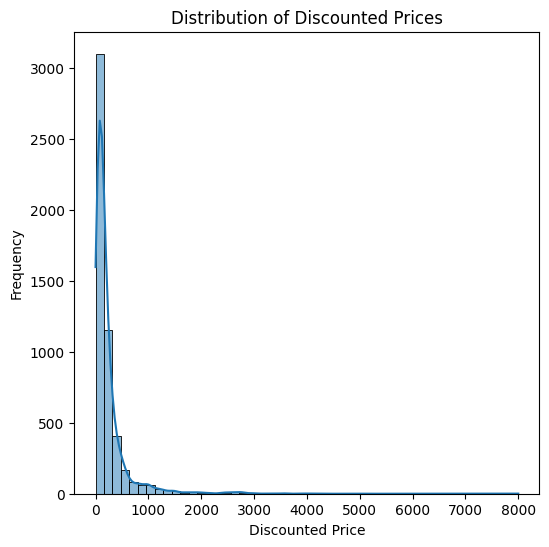

In [ ]:
# Plot the distribution of prices
plt.figure(figsize=(6, 6))
sns.histplot(df['Price'], bins=50, kde=True, color='orange')
plt.title('Distribution of Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Plot the distribution of discounted prices
plt.figure(figsize=(6, 6))
sns.histplot(df['DiscountedPrice'], bins=50, kde=True)
plt.title('Distribution of Discounted Prices')
plt.xlabel('Discounted Price')
plt.ylabel('Frequency')
plt.show()

**Category Analysis**

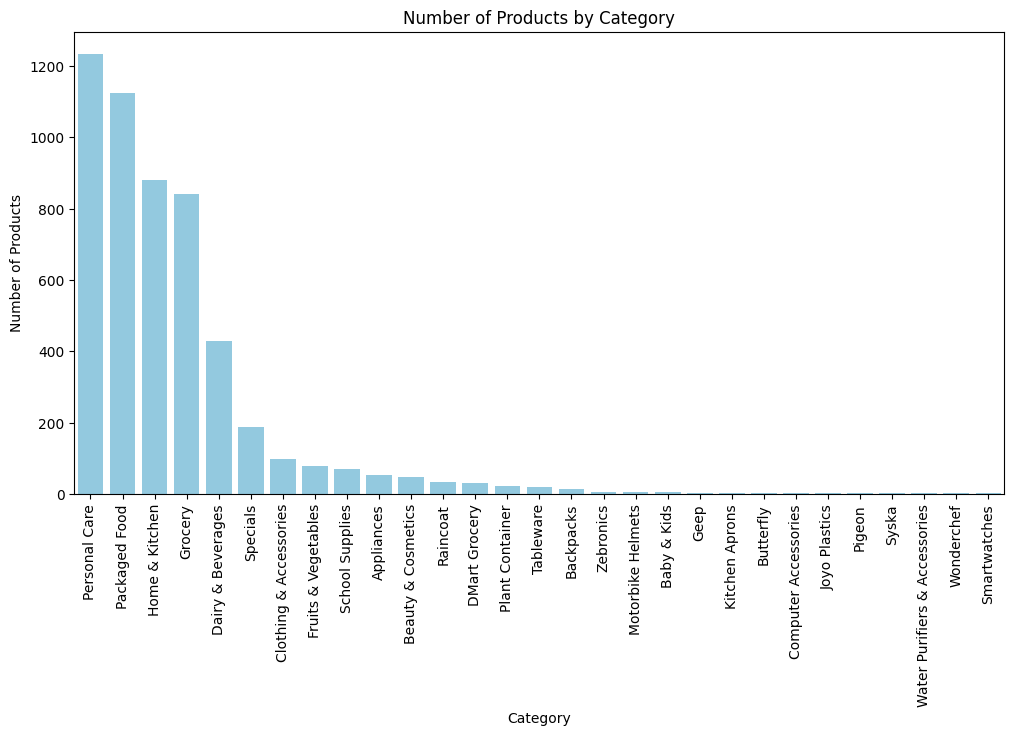

In [28]:
# Count the number of products in each category
category_counts = df['Category'].value_counts()

# Plot the distribution of products across categories
plt.figure(figsize=(12, 6))
sns.barplot(x=category_counts.index, y=category_counts.values,color='skyblue')
plt.title('Number of Products by Category')
plt.xlabel('Category')
plt.ylabel('Number of Products')
plt.xticks(rotation=90)
plt.show()

**Brand Analysis**

<ipython-input-34-c520673118dd>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=brand_counts[:10].index, y=brand_counts[:10].values,palette='Set1')


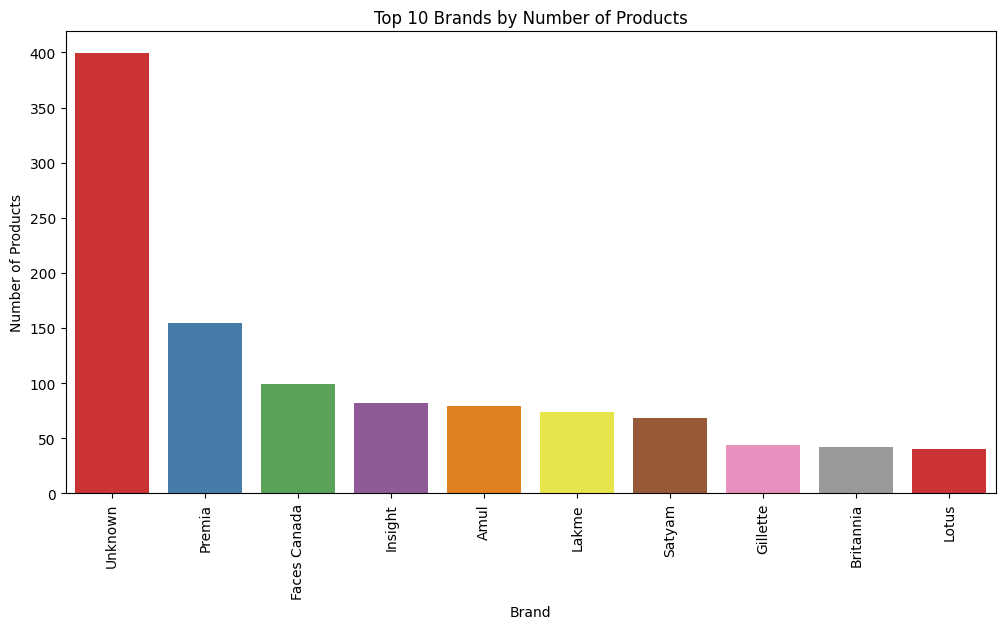

In [34]:
# Count the number of products for each brand
brand_counts = df['Brand'].value_counts()

# Plot the top 10 brands with the most products
plt.figure(figsize=(12, 6))
sns.barplot(x=brand_counts[:10].index, y=brand_counts[:10].values,palette='Set1')
plt.title('Top 10 Brands by Number of Products')
plt.xlabel('Brand')
plt.ylabel('Number of Products')
plt.xticks(rotation=90)
plt.show()

**Discount Analysis**

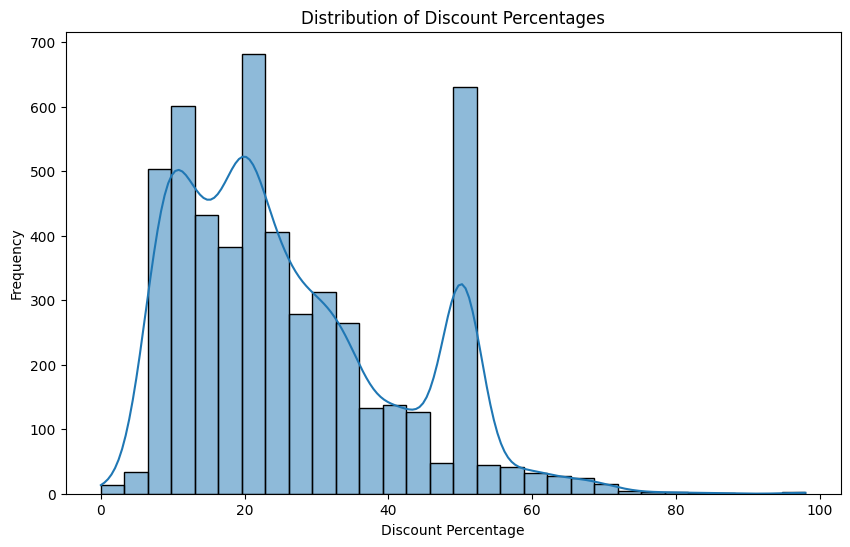

,Name,Brand,Price,DiscountedPrice,DiscountPercentage
2191,Naagin Indian Hot Sauce - Original,Naagin,50.0,1.0,98.000000
2192,Naagin Indian Hot Sauce - Smoky Bhoot,Naagin,50.0,1.0,98.000000
2193,Naagin Indian Hot Sauce - Kantha Bomb,Naagin,50.0,1.0,98.000000
4910,Disposable FFP2 Face Mask,Unknown,425.0,60.0,85.882353
3462,Geep Micro USB High Speed Charging Cable (1 Me...,Geep,299.0,49.0,83.612040
3469,Micro USB Charging Cable (1 Metre),Unknown,249.0,49.0,80.321285
4752,Zebronics Aux Cable ASC100,Zebronics,169.0,34.0,79.881657
3414,Syska LED Bulb B22 6500K,Syska,329.0,73.0,77.811550
2922,Dr.WaterR Stainless Steel Milk Frother,Dr.WaterR,1499.0,349.0,76.717812
3123,Trident Comfort Living Bath Towel 380 GSM - Ta...,Trident,599.0,149.0,75.125209


In [36]:
# Calculate the discount percentage
df['DiscountPercentage'] = ((df['Price'] - df['DiscountedPrice']) / df['Price']) * 100

# Plot the distribution of discount percentages
plt.figure(figsize=(10, 6))
sns.histplot(df['DiscountPercentage'], bins=30, kde=True)
plt.title('Distribution of Discount Percentages')
plt.xlabel('Discount Percentage')
plt.ylabel('Frequency')
plt.show()

# Find the top 10 products with the highest discount
top_discounts = df.nlargest(10, 'DiscountPercentage')
top_discounts[['Name', 'Brand', 'Price', 'DiscountedPrice', 'DiscountPercentage']]

**Sub-Category Analysis**

<ipython-input-38-4f57b463a1bd>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=subcategory_counts[:10].index, y=subcategory_counts[:10].values,palette='Set2')


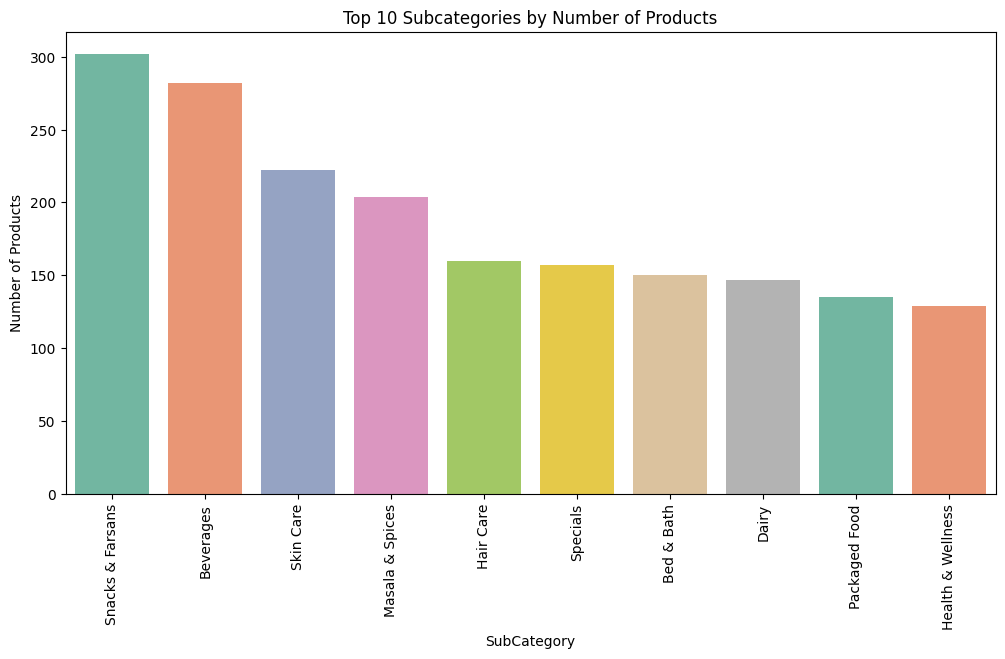

In [38]:
# Count the number of products in each subcategory
subcategory_counts = df['SubCategory'].value_counts()

# Plot the top 10 subcategories with the most products
plt.figure(figsize=(12, 6))
sns.barplot(x=subcategory_counts[:10].index, y=subcategory_counts[:10].values,palette='Set2')
plt.title('Top 10 Subcategories by Number of Products')
plt.xlabel('SubCategory')
plt.ylabel('Number of Products')
plt.xticks(rotation=90)
plt.show()

In [42]:
# Find the top 10 most expensive products
top_expensive = df.nlargest(10, 'Price')
top_expensive[['Name', 'Brand', 'Price', 'DiscountedPrice']]

,Name,Brand,Price,DiscountedPrice
2796,Philips UV-C Disinfection System,Philips,10990.0,7999.0
3490,Bathla Advance 5 Step Ladder-Orange,Bathla,8999.0,4699.0
3458,Godrej Goldilocks Personal White Locker,Godrej,7669.0,4999.0
3489,Bathla Advance 4 Step Ladder-Orange,Bathla,6799.0,4149.0
4790,Bajaj GX8 Mixer Grinder - 750 W,Bajaj,6275.0,3599.0
4788,Wonderchef Nutri-Blend Red With 3 Jars,Wonderchef,6100.0,2999.0
4791,Morphy Richards Primo Classique Mixer Grinder ...,Morphy Richards,6095.0,3999.0
5014,Portronics Kronos Y1 Smart Watch - Grey,Portronics,5999.0,2499.0
4781,Crompton Instant Water Heater,Crompton Greaves,5600.0,3899.0
406,Borges Extra Light Olive Oil,Borges,5500.0,2649.0


In [44]:
# Find the top 10 cheapest products
top_cheapest = df.nsmallest(10, 'Price')
top_cheapest[['Name', 'Brand', 'Price', 'DiscountedPrice']]

,Name,Brand,Price,DiscountedPrice
2230,Kopiko Cappuccino Coffee Candies,Kopiko,0.0,0.0
1344,Parle-G Original Gluco Biscuits,Parle,5.0,5.0
1380,Britannia Bourbon Sandwich Flavoured Biscuits,Britannia,10.0,9.0
1641,Act II Classic Salted Popcorn,ACT II,10.0,9.0
1647,Act II Golden Sizzle Popcorn,ACT II,10.0,9.0
1744,4700 BC Instant Butter Popcorn,4700 BC,10.0,8.0
1745,4700 BC Instant Barbeque Popcorn,4700 BC,10.0,8.0
1746,4700 BC Instant Seven Spices Popcorn,4700 BC,10.0,8.0
1747,4700 BC Instant Natural Popcorn,4700 BC,10.0,8.0
1753,Nutri Delite Chocoflakes,Nutri Delite,10.0,5.0


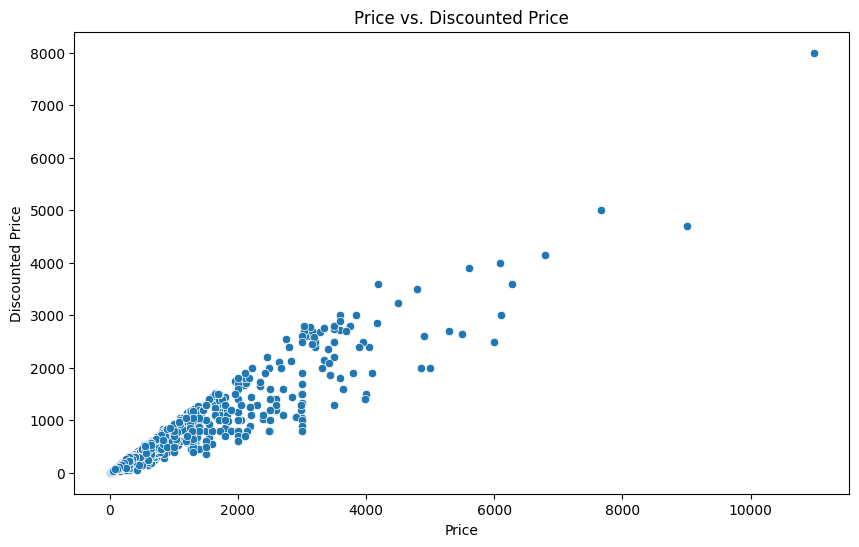

In [43]:
# Scatter plot of Price vs. Discounted Price
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Price'], y=df['DiscountedPrice'])
plt.title('Price vs. Discounted Price')
plt.xlabel('Price')
plt.ylabel('Discounted Price')
plt.show()

<ipython-input-49-04572db8b450>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=brand_avg_price[:10].index, y=brand_avg_price[:10].values,palette="Set3")


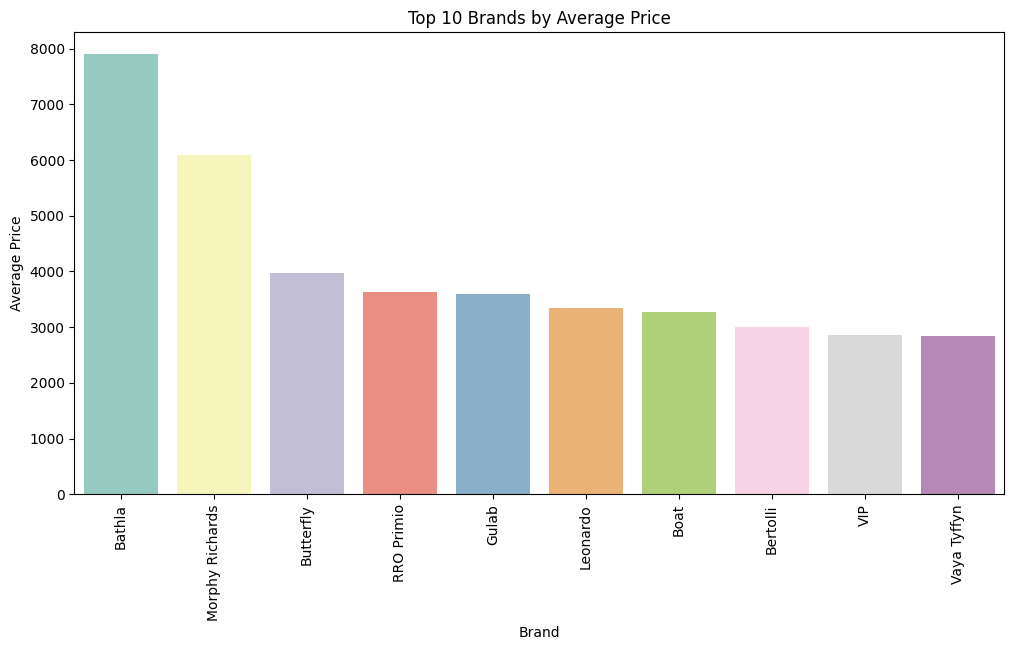

In [49]:
# Calculate the average price for each brand
brand_avg_price = df.groupby('Brand')['Price'].mean().sort_values(ascending=False)

# Plot the top 10 brands with the highest average price
plt.figure(figsize=(12, 6))
sns.barplot(x=brand_avg_price[:10].index, y=brand_avg_price[:10].values,palette="Set3")
plt.title('Top 10 Brands by Average Price')
plt.xlabel('Brand')
plt.ylabel('Average Price')
plt.xticks(rotation=90)
plt.show()

<ipython-input-53-3f2244c99e7d>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=brand_avg_discount[:10].index, y=brand_avg_discount[:10].values,palette="Set2")


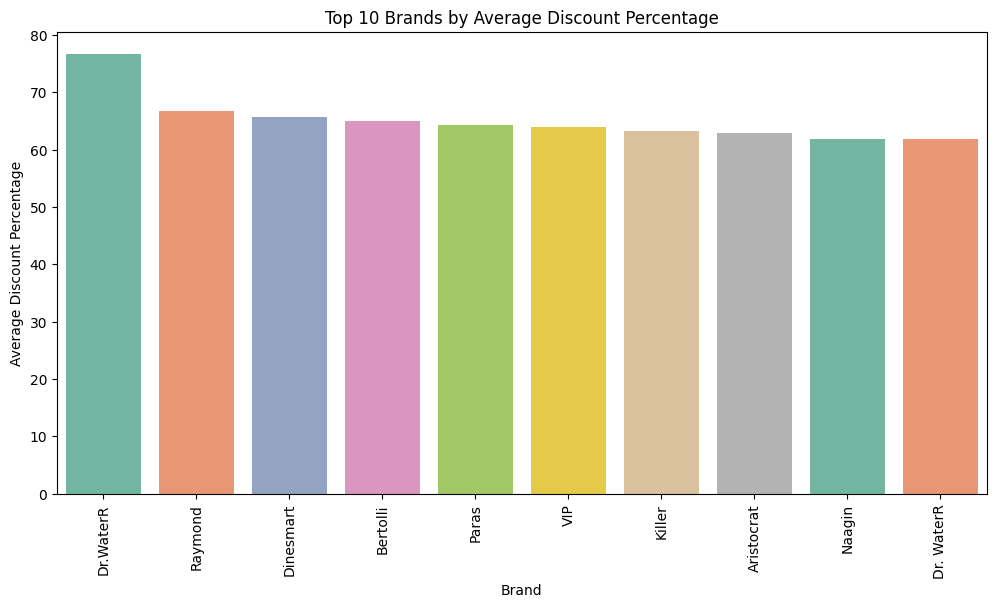

In [53]:
# Calculate the average discount percentage for each brand
brand_avg_discount = df.groupby('Brand')['DiscountPercentage'].mean().sort_values(ascending=False)

# Plot the top 10 brands with the highest average discount percentage
plt.figure(figsize=(12, 6))
sns.barplot(x=brand_avg_discount[:10].index, y=brand_avg_discount[:10].values,palette="Set2")
plt.title('Top 10 Brands by Average Discount Percentage')
plt.xlabel('Brand')
plt.ylabel('Average Discount Percentage')
plt.xticks(rotation=90)
plt.show()